# Imports and Helper Functions

In [11]:
import json
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# This function reads the JSON file and converts it into a clean Pandas DataFrame
def load_stats(filepath):
    if not os.path.exists(filepath):
        print(f"File not found: {filepath}")
        return None
        
    with open(filepath, 'r') as f:
        data = json.load(f)
        
    df = pd.DataFrame(data['train_stats'])
    return df

# Reinforcement learning data is very spiky. This applies a moving average so we can see the trend.
def smooth_data(data, window=100):
    return data.rolling(window=window, min_periods=1).mean()

# Generating json files to compare different hyperparameters performance

In [12]:
# Create the results folder if it doesn't exist
os.makedirs('results', exist_ok=True)

print("Running Baseline...")
!python q_learning_simulator.py --alpha 0.1 --epsilon 0.1 --gamma 0.9 --episodes 5000 --export-stats results/baseline.json --no-gui

print("Running Alpha Variations...")
!python q_learning_simulator.py --alpha 0.01 --epsilon 0.1 --gamma 0.9 --episodes 5000 --export-stats results/alpha_0.01.json --no-gui
!python q_learning_simulator.py --alpha 0.001 --epsilon 0.1 --gamma 0.9 --episodes 5000 --export-stats results/alpha_0.001.json --no-gui
!python q_learning_simulator.py --alpha 0.2 --epsilon 0.1 --gamma 0.9 --episodes 5000 --export-stats results/alpha_0.2.json --no-gui

print("Running Epsilon Variations...")
!python q_learning_simulator.py --alpha 0.1 --epsilon 0.2 --gamma 0.9 --episodes 5000 --export-stats results/eps_0.2.json --no-gui
!python q_learning_simulator.py --alpha 0.1 --epsilon 0.3 --gamma 0.9 --episodes 5000 --export-stats results/eps_0.3.json --no-gui

print("All training runs completed successfully!")

Running Baseline...

--- Environment Description (from assignment2_utils) ---
Observation space:  Discrete(500)
Observation space size:  500
Reward Range:  (-inf, inf)
Number of actions:  6
Action description:  {0: 'Move south (down)', 1: 'Move north (up)', 2: 'Move east (right)', 3: 'Move west (left)', 4: 'Pickup passenger', 5: 'Drop off passenger'}
--------------------------------------------------------

[episode     50] avg_reward=-372.240 avg_len=189.8 success_rate=16.00% eps=0.100
[episode    100] avg_reward=-251.960 avg_len=178.0 success_rate=30.00% eps=0.100
[episode    150] avg_reward=-246.720 avg_len=177.0 success_rate=40.00% eps=0.100
[episode    200] avg_reward=-208.800 avg_len=152.1 success_rate=54.00% eps=0.100
[episode    250] avg_reward=-184.380 avg_len=144.9 success_rate=70.00% eps=0.100
[episode    300] avg_reward=-155.920 avg_len=122.0 success_rate=80.00% eps=0.100
[episode    350] avg_reward=-134.080 avg_len=112.4 success_rate=86.00% eps=0.100
[episode    400] avg_r

# Load the Data

In [13]:
# Load all generated JSON files
baseline = load_stats('results/baseline.json')

# Alpha variations
alpha_01 = load_stats('results/alpha_0.01.json')
alpha_001 = load_stats('results/alpha_0.001.json')
alpha_2 = load_stats('results/alpha_0.2.json')

# Epsilon variations
eps_2 = load_stats('results/eps_0.2.json')
eps_3 = load_stats('results/eps_0.3.json')

print("All data loaded successfully!")

All data loaded successfully!


# Plotting Total Steps per Episode

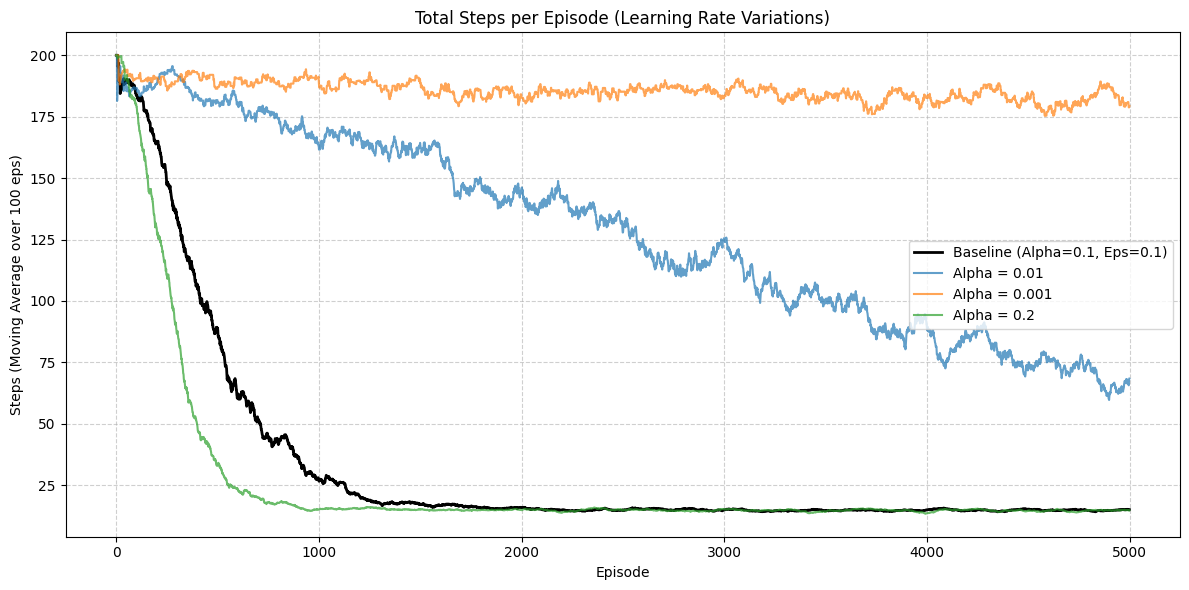

In [14]:
plt.figure(figsize=(12, 6))

# Define the smoothing window (100 episodes)
window = 100

# Plotting the baseline and the Alpha variations
plt.plot(baseline['episode'], smooth_data(baseline['steps'], window), label='Baseline (Alpha=0.1, Eps=0.1)', color='black', linewidth=2)
plt.plot(alpha_01['episode'], smooth_data(alpha_01['steps'], window), label='Alpha = 0.01', alpha=0.7)
plt.plot(alpha_001['episode'], smooth_data(alpha_001['steps'], window), label='Alpha = 0.001', alpha=0.7)
plt.plot(alpha_2['episode'], smooth_data(alpha_2['steps'], window), label='Alpha = 0.2', alpha=0.7)

plt.title('Total Steps per Episode (Learning Rate Variations)')
plt.xlabel('Episode')
plt.ylabel(f'Steps (Moving Average over {window} eps)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()

# Plotting Average Return (Reward) per Episode

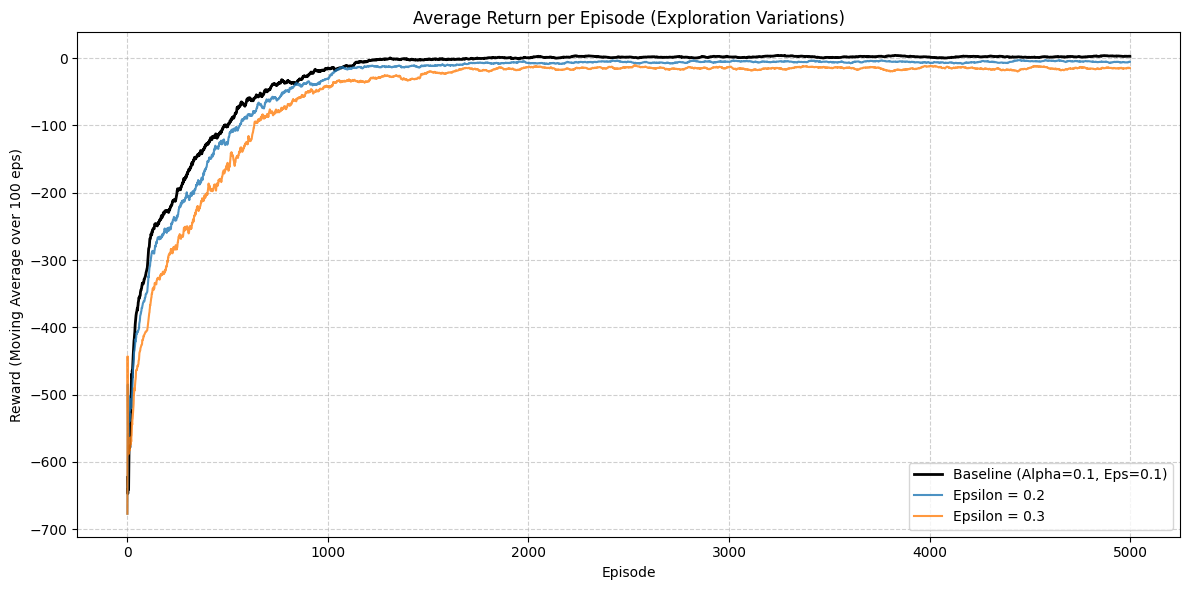

In [15]:
plt.figure(figsize=(12, 6))

# Plotting the baseline and the Epsilon variations
plt.plot(baseline['episode'], smooth_data(baseline['total_reward'], window), label='Baseline (Alpha=0.1, Eps=0.1)', color='black', linewidth=2)
plt.plot(eps_2['episode'], smooth_data(eps_2['total_reward'], window), label='Epsilon = 0.2', alpha=0.8)
plt.plot(eps_3['episode'], smooth_data(eps_3['total_reward'], window), label='Epsilon = 0.3', alpha=0.8)

plt.title('Average Return per Episode (Exploration Variations)')
plt.xlabel('Episode')
plt.ylabel(f'Reward (Moving Average over {window} eps)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()